In [2]:
# Import the necessary library files
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

In [3]:
# Import dataset
dataset = pd.read_csv("cereal_dataset.csv")
dataset

,Cereal,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Shelf,Potassium,Vitamins,Weight,Cups
0,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,1,70,25,1.00,0.75
1,Basic 4,G,C,130,3,2,210,2.0,18.0,8,3,100,25,1.33,0.75
2,Cheerios,G,C,110,6,2,290,2.0,17.0,1,1,105,25,1.00,1.25
3,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,2,45,25,1.00,0.75
4,Clusters,G,C,110,3,2,140,2.0,13.0,7,3,105,25,1.00,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Rice Chex,R,C,110,1,0,240,0.0,23.0,2,1,30,25,1.00,1.13
73,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,1,115,25,1.00,0.67
74,Maypo,A,H,100,4,1,0,0.0,16.0,3,2,95,25,1.00,-1.00
75,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,2,-1,0,1.00,1.00


In [ ]:
# Check the dataset to find whether there is any inconsistancy or not
dataset.max()

In [ ]:
dataset.min()

In [ ]:
# Process dataset
a = dataset
dataset.columns
len(a["Sugars"])

In [ ]:
# Replace the cells contains negative values with mean value of the cell
a = dataset
i = 0
while i<len(a["Sugars"]):
    if a["Sugars"][i]<0:
        a["Sugars"][i] = float("NaN")
        a["Sugars"] = a["Sugars"].fillna(a["Sugars"].mean())
    if a["Carbohydrates"][i]<0:
        a["Carbohydrates"][i] = float("NaN")
        a["Carbohydrates"] = a["Carbohydrates"].fillna(a["Carbohydrates"].mean())
    if a["Potassium"][i]<0:
        a["Potassium"][i] = float("NaN")
        a["Potassium"] = a["Potassium"].fillna(a["Potassium"].mean())
    if a["Weight"][i]<0:
        a["Weight"][i] = float("NaN")
        a["Weight"] = a["Weight"].fillna(a["Weight"].mean())
    if a["Cups"][i]<0:
        a["Cups"][i] = float("NaN")
        a["Cups"] = a["Cups"].fillna(a["Cups"].mean())
    i+=1

In [ ]:
# Export the updated dataset as csv file
a.to_csv("exported-a.csv", index = False)

In [41]:
# Import New (Processed) dataset
new_dataset = pd.read_csv("exported-a.csv")
new_dataset

,Cereal,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Shelf,Potassium,Vitamins,Weight,Cups
0,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.500000,10.000000,1,70.000000,25,1.00,0.750000
1,Basic 4,G,C,130,3,2,210,2.0,18.000000,8.000000,3,100.000000,25,1.33,0.750000
2,Cheerios,G,C,110,6,2,290,2.0,17.000000,1.000000,1,105.000000,25,1.00,1.250000
3,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.000000,9.000000,2,45.000000,25,1.00,0.750000
4,Clusters,G,C,110,3,2,140,2.0,13.000000,7.000000,3,105.000000,25,1.00,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Rice Chex,R,C,110,1,0,240,0.0,23.000000,2.000000,1,30.000000,25,1.00,1.130000
73,Wheat Chex,R,C,100,3,1,230,3.0,17.000000,3.000000,1,115.000000,25,1.00,0.670000
74,Maypo,A,H,100,4,1,0,0.0,16.000000,3.000000,2,95.000000,25,1.00,0.785442
75,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.000000,0.000000,2,98.649411,0,1.00,1.000000


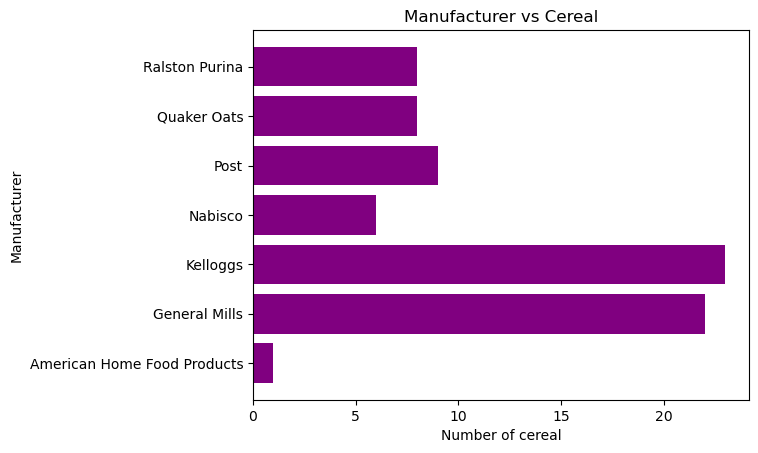

In [42]:
# Case-1: Manufacturer vs Number of cereal
m_name = ['A', 'G', 'K', 'N', 'P', 'Q', 'R']    # Manufacturers' names

i = 0
p_num = []    # Number of product manufactured by companies
while i<len(m_name):
    x = 0
    for j in new_dataset["Manufacturer"]:
        if j == m_name[i]:
            x += 1
    p_num.append(x)
    i += 1

# Manufacturers' full names
new_name = ['American Home Food Products', 'General Mills', 'Kelloggs', 
            'Nabisco', 'Post', 'Quaker Oats', 'Ralston Purina']

# Plot the data
plt.barh(new_name, p_num, color = "purple")
plt.xlabel("Number of cereal")
plt.ylabel("Manufacturer")
plt.title("Manufacturer vs Cereal")
plt.show()

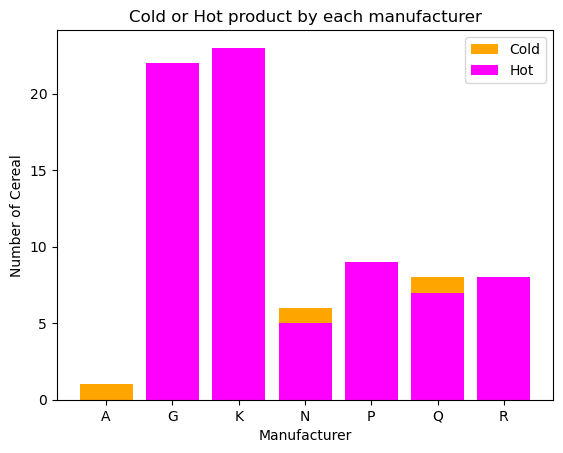

In [43]:
# Case 2: Manufacturer vs "cold or hot"
types = list(set(new_dataset["Type"]))

# Finding number of cold and hot product for each manufacturer
i = 0
list_type = []
for i in m_name:
    j = 0
    x = 0
    y = 0
    
    while j<len(new_dataset["Manufacturer"]):
        if new_dataset["Manufacturer"][j] == i and new_dataset["Type"][j] == types[0]:
            x+=1
        elif new_dataset["Manufacturer"][j] == i and new_dataset["Type"][j] == types[1]:
            y+=1
        j+=1
    
    # Here, x = No. of cold items, and y = No. of hot items
    list_type.append([x, y])


# Storing cold and hot product in different variables
k = 0
new_list_cold = []    # No. of cold products for each manufacturer
new_list_hot = []    # No. of hot products for each manufacturer

while k<len(types):
    l = 0
    while l<len(list_type):
        if k == 0:
            new_list_cold.append(list_type[l][k])
        elif k == 1:
            new_list_hot.append(list_type[l][k])
        l+=1
    k+=1
    
# Plot the data
array_hot = np.array(new_list_hot)
array_cold = np.array(new_list_cold)
plt.bar(m_name, array_hot+array_cold, color = 'orange', label = 'Cold')
plt.bar(m_name, array_hot, color='magenta', label = "Hot")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Cereal")
plt.title("Cold or Hot product by each manufacturer")
plt.legend()
plt.show()

In [44]:
# Case 3: Protein vs Fiber

# Finding the ratios of fiber and protein of each manufacturer
i = 0
j = 0
ratios_a = []
ratios_g = []
ratios_k = []
ratios_n = []
ratios_p = []
ratios_q = []
ratios_r = []

while i<len(new_dataset["Cereal"]):
    if new_dataset["Manufacturer"][i] == m_name[0]:
        ratios_a.append(new_dataset["Fiber"][i]/new_dataset["Protein"][i])
    elif new_dataset["Manufacturer"][i] == m_name[1]:
        ratios_g.append(new_dataset["Fiber"][i]/new_dataset["Protein"][i])
    elif new_dataset["Manufacturer"][i] == m_name[2]:
        ratios_k.append(new_dataset["Fiber"][i]/new_dataset["Protein"][i])
    elif new_dataset["Manufacturer"][i] == m_name[3]:
        ratios_n.append(new_dataset["Fiber"][i]/new_dataset["Protein"][i])
    elif new_dataset["Manufacturer"][i] == m_name[4]:
        ratios_p.append(new_dataset["Fiber"][i]/new_dataset["Protein"][i])
    elif new_dataset["Manufacturer"][i] == m_name[5]:
        ratios_q.append(new_dataset["Fiber"][i]/new_dataset["Protein"][i])
    elif new_dataset["Manufacturer"][i] == m_name[6]:
        ratios_r.append(new_dataset["Fiber"][i]/new_dataset["Protein"][i])
    i+=1

# print(ratios_k,ratios_n)

In [45]:
# Finding the index values of each manufacturer
indexes_a = []
indexes_g = []
indexes_k = []
indexes_n = []
indexes_p = []
indexes_q = []
indexes_r = []

i = 0

while i<len(new_dataset["Manufacturer"]):
    if new_dataset["Manufacturer"][i] == m_name[0]:
        indexes_a.append(i)
    elif new_dataset["Manufacturer"][i] == m_name[1]:
        indexes_g.append(i)
    elif new_dataset["Manufacturer"][i] == m_name[2]:
        indexes_k.append(i)
    elif new_dataset["Manufacturer"][i] == m_name[3]:
        indexes_n.append(i)
    elif new_dataset["Manufacturer"][i] == m_name[4]:
        indexes_p.append(i)
    elif new_dataset["Manufacturer"][i] == m_name[5]:
        indexes_q.append(i)
    elif new_dataset["Manufacturer"][i] == m_name[6]:
        indexes_r.append(i)
    i += 1
# print(indexes_k, indexes_n, indexes_r, indexes_q, indexes_g, indexes_p, indexes_a)

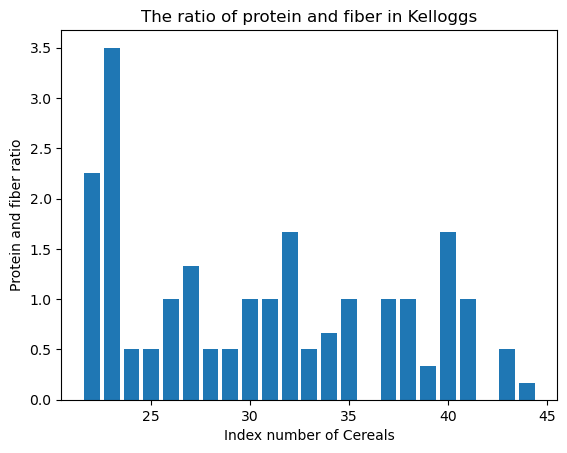

In [46]:
# Plot the data
plt.bar(indexes_k, ratios_k)
plt.xlabel("Index number of Cereals")
plt.ylabel("Protein and fiber ratio")
plt.title("The ratio of protein and fiber in Kelloggs")
plt.show()

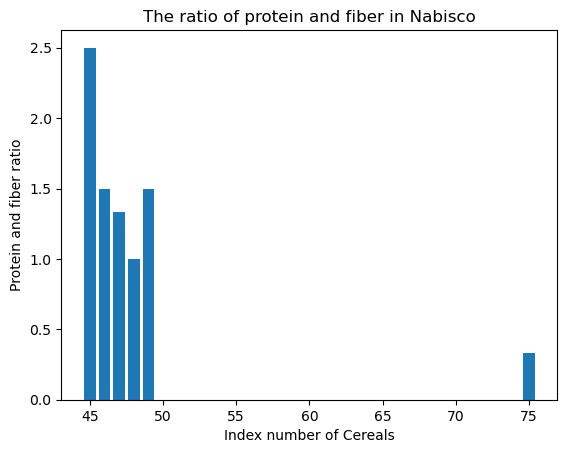

In [47]:
plt.bar(indexes_n, ratios_n)
plt.xlabel("Index number of Cereals")
plt.ylabel("Protein and fiber ratio")
plt.title("The ratio of protein and fiber in Nabisco")
plt.show()

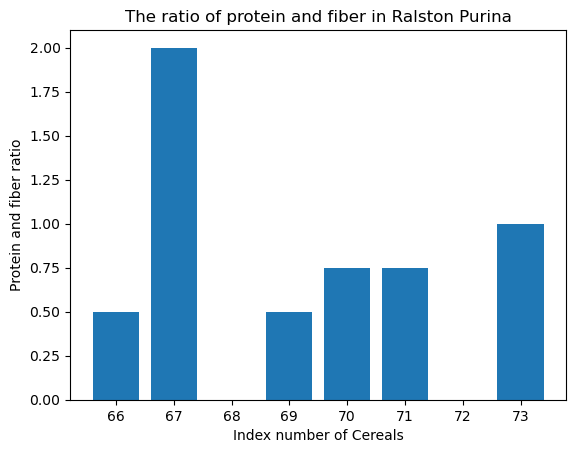

In [48]:
plt.bar(indexes_r, ratios_r)
plt.xlabel("Index number of Cereals")
plt.ylabel("Protein and fiber ratio")
plt.title("The ratio of protein and fiber in Ralston Purina")
plt.show()

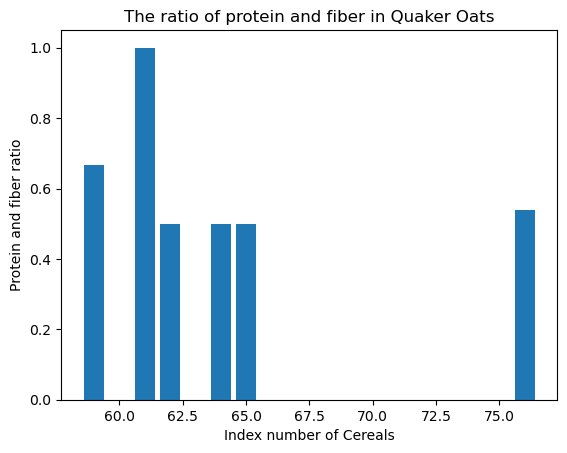

In [49]:
plt.bar(indexes_q, ratios_q)
plt.xlabel("Index number of Cereals")
plt.ylabel("Protein and fiber ratio")
plt.title("The ratio of protein and fiber in Quaker Oats")
plt.show()

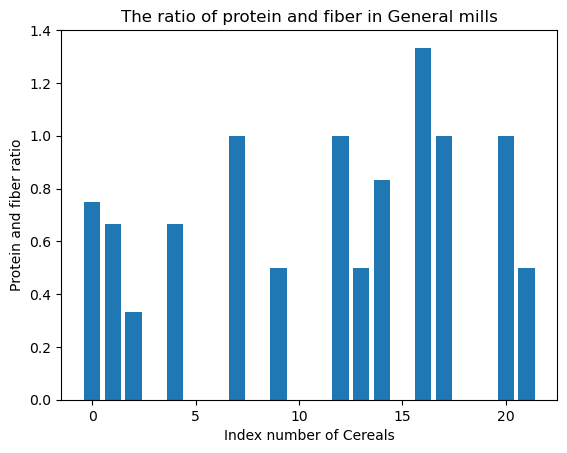

In [50]:
plt.bar(indexes_g, ratios_g)
plt.xlabel("Index number of Cereals")
plt.ylabel("Protein and fiber ratio")
plt.title("The ratio of protein and fiber in General mills")
plt.show()

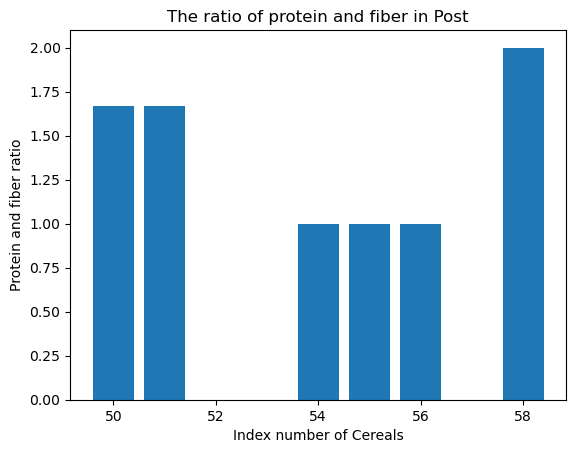

In [51]:
plt.bar(indexes_p, ratios_p)
plt.xlabel("Index number of Cereals")
plt.ylabel("Protein and fiber ratio")
plt.title("The ratio of protein and fiber in Post")
plt.show()

In [52]:
# plt.bar(indexes_a, ratios_a)

In [53]:
# Case 4: Average protein and fiber ratio values vs manufacturer
mean_ratios = [st.mean(ratios_a), st.mean(ratios_g), st.mean(ratios_k), st.mean(ratios_n),
               st.mean(ratios_p), st.mean(ratios_q), st.mean(ratios_r)]

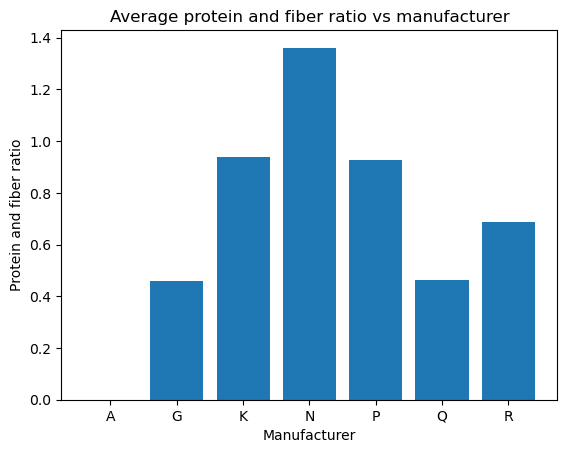

In [54]:
plt.bar(m_name, mean_ratios)
plt.xlabel("Manufacturer")
plt.ylabel("Protein and fiber ratio")
plt.title("Average protein and fiber ratio vs manufacturer")
plt.show()

In [18]:
# Case 5:

# Protein and fiber Mean and standard deviation value for G
i = 0
g_protein = []
g_fiber = []
for i in indexes_g:
    g_protein.append(new_dataset["Protein"][i])
    g_fiber.append(new_dataset["Fiber"][i])
mean_g_protein = st.mean(g_protein)
mean_g_fiber = st.mean(g_fiber)
std_g_protein = st.stdev(g_protein)
std_g_fiber = st.stdev(g_fiber)

# Protein and fiber Mean and standard deviation value for K
i = 0
k_protein = []
k_fiber = []
for i in indexes_k:
    k_protein.append(new_dataset["Protein"][i])
    k_fiber.append(new_dataset["Fiber"][i])
mean_k_protein = st.mean(k_protein)
mean_k_fiber = st.mean(k_fiber)
std_k_protein = st.stdev(k_protein)
std_k_fiber = st.stdev(k_fiber)

# Protein and fiber Mean and standard deviation value for N
i = 0
n_protein = []
n_fiber = []
for i in indexes_n:
    n_protein.append(new_dataset["Protein"][i])
    n_fiber.append(new_dataset["Fiber"][i])
mean_n_protein = st.mean(n_protein)
mean_n_fiber = st.mean(n_fiber)
std_n_protein = st.stdev(n_protein)
std_n_fiber = st.stdev(n_fiber)

# Protein and fiber Mean and standard deviation value for P
i = 0
p_protein = []
p_fiber = []
for i in indexes_p:
    p_protein.append(new_dataset["Protein"][i])
    p_fiber.append(new_dataset["Fiber"][i])
mean_p_protein = st.mean(p_protein)
mean_p_fiber = st.mean(p_fiber)
std_p_protein = st.stdev(p_protein)
std_p_fiber = st.stdev(p_fiber)

# Protein and fiber Mean and standard deviation value for Q
i = 0
q_protein = []
q_fiber = []
for i in indexes_q:
    q_protein.append(new_dataset["Protein"][i])
    q_fiber.append(new_dataset["Fiber"][i])
mean_q_protein = st.mean(q_protein)
mean_q_fiber = st.mean(q_fiber)
std_q_protein = st.stdev(q_protein)
std_q_fiber = st.stdev(q_fiber)

# Protein and fiber Mean and standard deviation value for R
i = 0
r_protein = []
r_fiber = []
for i in indexes_r:
    r_protein.append(new_dataset["Protein"][i])
    r_fiber.append(new_dataset["Fiber"][i])
mean_r_protein = st.mean(r_protein)
mean_r_fiber = st.mean(r_fiber)
std_r_protein = st.stdev(r_protein)
std_r_fiber = st.stdev(r_fiber)

In [55]:
# Plot the data
mean_protein = [mean_g_protein, mean_k_protein, mean_n_protein, mean_p_protein, mean_q_protein, mean_r_protein]
std_protein = [std_g_protein, std_k_protein, std_n_protein, std_p_protein, std_q_protein, std_r_protein]
mean_fiber = [mean_g_fiber, mean_k_fiber, mean_n_fiber, mean_p_fiber, mean_q_fiber, mean_r_fiber]
std_fiber = [std_g_fiber, std_k_fiber, std_n_fiber, std_p_fiber, std_q_fiber, std_r_fiber]


# plt.bar(m_name[1:], mean_protein, color = 'orange')
# plt.bar(m_name[1:], std_protein, color = 'green')
# plt.show()
# plt.bar(mean_fiber, std_fiber)

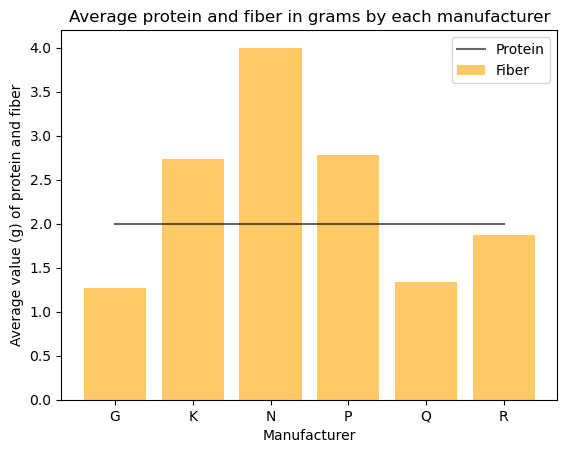

In [106]:
plt.bar(m_name[1:], mean_fiber, color = 'orange', alpha = 0.6)
plt.plot(m_name[1:], mean_protein, color = 'black', alpha = 0.6)
plt.xlabel("Manufacturer")
plt.ylabel("Average value (g) of protein and fiber")
plt.title("Average protein and fiber in grams by each manufacturer")
plt.legend(labels = ['Protein', 'Fiber'])
plt.show()

In [57]:
# from scipy.stats import norm
# plt.plot(mean_protein, norm.pdf(mean_protein, st.mean(mean_protein), st.stdev(mean_protein)))

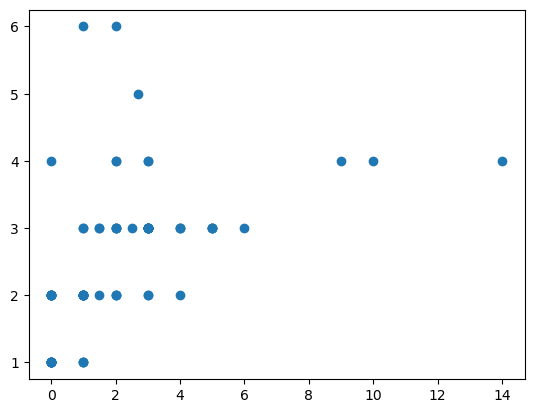

In [23]:
plt.scatter(new_dataset["Fiber"], new_dataset["Protein"])

In [59]:
new_dataset["Protein"].max()

6

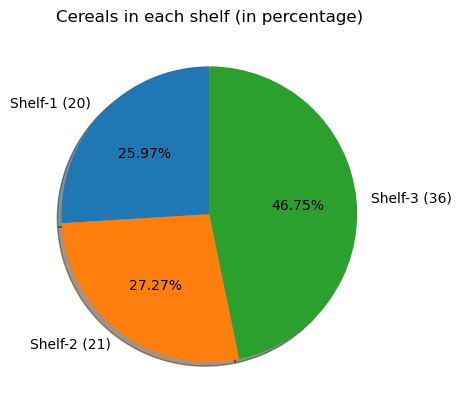

In [60]:
# Case 6: cereal in each shelf

shelf_num = [1, 2, 3]
i = 0
num_cereal = []
while i<len(shelf_num):
    x = 0
    y = 0
    for x in new_dataset["Shelf"]:
        if x == shelf_num[i]:
            y+=1
    num_cereal.append(y)
    i+=1

all_shelf = [f'Shelf-1 ({num_cereal[0]})', f'Shelf-2 ({num_cereal[1]})', f'Shelf-3 ({num_cereal[2]})']

# Plot the data
plt.pie(num_cereal, labels = all_shelf, shadow = True, startangle = 90, autopct='%1.2f%%')
plt.title("Cereals in each shelf (in percentage)")
plt.show()

In [61]:
# Case 7: Types vs Sodium
# For Manufacturer G 
sodium_g = []
x = 0
for x in indexes_g:
    sodium_g.append(new_dataset["Sodium"][x])\
    
sodium_g_mean = st.mean(sodium_g)
sodium_g_std = st.stdev(sodium_g)

# For Manufacturer K
sodium_k = []
x = 0
for x in indexes_k:
    sodium_k.append(new_dataset["Sodium"][x])

sodium_k_mean = st.mean(sodium_k)
sodium_k_std = st.stdev(sodium_k)

# For Manufacturer N
sodium_n = []
x = 0
for x in indexes_n:
    sodium_n.append(new_dataset["Sodium"][x])

sodium_n_mean = st.mean(sodium_n)
sodium_n_std = st.stdev(sodium_n)

# For Manufacturer P
sodium_p = []
x = 0
for x in indexes_p:
    sodium_p.append(new_dataset["Sodium"][x])
    
sodium_p_mean = st.mean(sodium_p)
sodium_p_std = st.stdev(sodium_p)

# For Manufacturer Q
sodium_q = []
x = 0
for x in indexes_q:
    sodium_q.append(new_dataset["Sodium"][x])

sodium_q_mean = st.mean(sodium_q)
sodium_q_std = st.stdev(sodium_q)

# For Manufacturer R
sodium_r = []
x = 0
for x in indexes_r:
    sodium_r.append(new_dataset["Sodium"][x])

sodium_r_mean = st.mean(sodium_r)
sodium_r_std = st.stdev(sodium_r)

# Sodium mean and standard deviation values
sodium_mean = [sodium_g_mean, sodium_k_mean, sodium_n_mean, sodium_p_mean, sodium_q_mean, sodium_r_mean]
sodium_std = [sodium_g_std, sodium_k_std, sodium_n_std, sodium_p_std, sodium_q_std, sodium_r_std]

# print(sodium_mean, sodium_std)

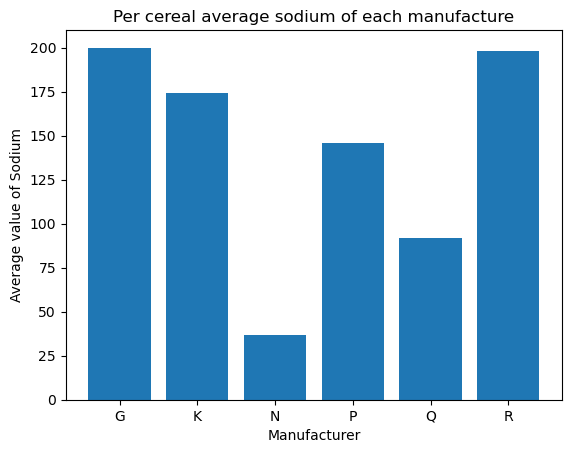

In [63]:
# Plot the data
plt.bar(m_name[1:], sodium_mean)
plt.xlabel("Manufacturer")
plt.ylabel("Average value of Sodium")
plt.title("Average sodium of each manufacture")
plt.show()

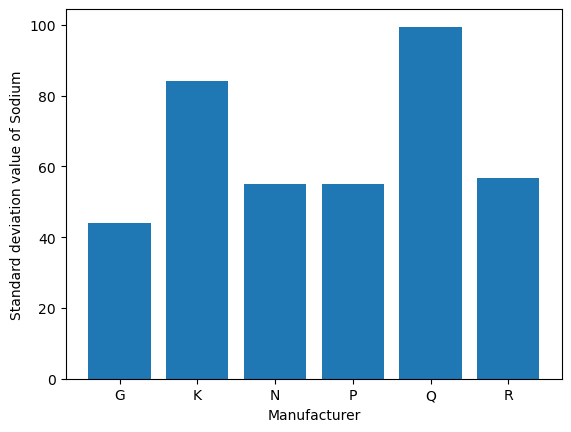

In [30]:
plt.bar(m_name[1:], sodium_std)
# plt.plot(m_name[1:], sodium_std)
plt.xlabel("Manufacturer")
plt.ylabel("Standard deviation value of Sodium")
# plt.title("")
plt.show()

In [75]:
# Case 8: Carbohydrate vs sugar
# Protein and fiber Mean and standard deviation value for G
i = 0
g_carbohydrate = []
g_sugar = []
for i in indexes_g:
    g_carbohydrate.append(new_dataset["Carbohydrates"][i])
    g_sugar.append(new_dataset["Sugars"][i])
mean_g_carbohydrate = st.mean(g_carbohydrate)
mean_g_sugar = st.mean(g_sugar)
std_g_carbohydrate = st.stdev(g_carbohydrate)
std_g_sugar = st.stdev(g_sugar)

# Protein and fiber Mean and standard deviation value for K
i = 0
k_carbohydrate = []
k_sugar = []
for i in indexes_k:
    k_carbohydrate.append(new_dataset["Carbohydrates"][i])
    k_sugar.append(new_dataset["Sugars"][i])
mean_k_carbohydrate = st.mean(k_carbohydrate)
mean_k_sugar = st.mean(k_sugar)
std_k_carbohydrate = st.stdev(k_carbohydrate)
std_k_sugar = st.stdev(k_sugar)

# Protein and fiber Mean and standard deviation value for N
i = 0
n_carbohydrate = []
n_sugar = []
for i in indexes_n:
    n_carbohydrate.append(new_dataset["Carbohydrates"][i])
    n_sugar.append(new_dataset["Sugars"][i])
mean_n_carbohydrate = st.mean(n_carbohydrate)
mean_n_sugar = st.mean(n_sugar)
std_n_carbohydrate = st.stdev(n_carbohydrate)
std_n_sugar = st.stdev(n_sugar)

# Protein and fiber Mean and standard deviation value for P
i = 0
p_carbohydrate = []
p_sugar = []
for i in indexes_p:
    p_carbohydrate.append(new_dataset["Carbohydrates"][i])
    p_sugar.append(new_dataset["Sugars"][i])
mean_p_carbohydrate = st.mean(p_carbohydrate)
mean_p_sugar = st.mean(p_sugar)
std_p_carbohydrate = st.stdev(p_carbohydrate)
std_p_sugar = st.stdev(p_sugar)

# Protein and fiber Mean and standard deviation value for Q
i = 0
q_carbohydrate = []
q_sugar = []
for i in indexes_q:
    q_carbohydrate.append(new_dataset["Carbohydrates"][i])
    q_sugar.append(new_dataset["Sugars"][i])
mean_q_carbohydrate = st.mean(q_carbohydrate)
mean_q_sugar = st.mean(q_sugar)
std_q_carbohydrate = st.stdev(q_carbohydrate)
std_q_sugar = st.stdev(q_sugar)

# Protein and fiber Mean and standard deviation value for R
i = 0
r_carbohydrate = []
r_sugar = []
for i in indexes_r:
    r_carbohydrate.append(new_dataset["Carbohydrates"][i])
    r_sugar.append(new_dataset["Sugars"][i])
mean_r_carbohydrate = st.mean(r_carbohydrate)
mean_r_sugar = st.mean(r_sugar)
std_r_carbohydrate = st.stdev(r_carbohydrate)
std_r_sugar = st.stdev(r_sugar)


carbohydrate_mean = [mean_g_carbohydrate, mean_k_carbohydrate, mean_n_carbohydrate, 
                     mean_p_carbohydrate, mean_q_carbohydrate, mean_r_carbohydrate]
sugar_mean = [mean_g_sugar, mean_k_sugar, mean_n_sugar, mean_p_sugar, mean_q_sugar, 
             mean_r_sugar]
carbohydrate_std = [std_g_carbohydrate, std_k_carbohydrate, std_n_carbohydrate, 
                   std_p_carbohydrate, std_q_carbohydrate, std_r_carbohydrate]
sugar_std = [std_g_sugar, std_k_sugar, std_n_sugar, std_p_sugar, std_q_sugar, std_r_sugar]

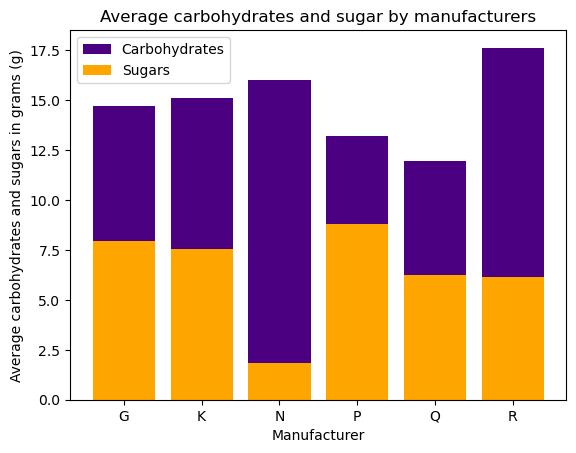

In [107]:
# Plot the data
plt.bar(m_name[1:], carbohydrate_mean, color = 'indigo')
plt.bar(m_name[1:], sugar_mean, color = 'orange')
plt.xlabel("Manufacturer")
plt.ylabel("Average carbohydrates and sugars in grams (g)")
plt.title("Average carbohydrates and sugar by manufacturers")
plt.legend(labels = ['Carbohydrates', 'Sugars'])
plt.show()

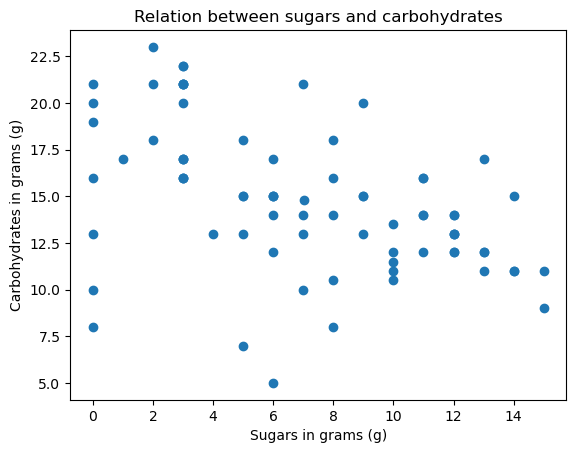

In [99]:
# Relation in carbohydrates and sugar
# , color = sc_color
sc_color = np.array(["blue", "red"])
plt.scatter(new_dataset["Sugars"], new_dataset["Carbohydrates"])
plt.xlabel("Sugars in grams (g)")
plt.ylabel("Carbohydrates in grams (g)")
plt.title("Relation between sugars and carbohydrates")
plt.show()

In [101]:
new_dataset

,Cereal,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Shelf,Potassium,Vitamins,Weight,Cups
0,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.500000,10.000000,1,70.000000,25,1.00,0.750000
1,Basic 4,G,C,130,3,2,210,2.0,18.000000,8.000000,3,100.000000,25,1.33,0.750000
2,Cheerios,G,C,110,6,2,290,2.0,17.000000,1.000000,1,105.000000,25,1.00,1.250000
3,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.000000,9.000000,2,45.000000,25,1.00,0.750000
4,Clusters,G,C,110,3,2,140,2.0,13.000000,7.000000,3,105.000000,25,1.00,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Rice Chex,R,C,110,1,0,240,0.0,23.000000,2.000000,1,30.000000,25,1.00,1.130000
73,Wheat Chex,R,C,100,3,1,230,3.0,17.000000,3.000000,1,115.000000,25,1.00,0.670000
74,Maypo,A,H,100,4,1,0,0.0,16.000000,3.000000,2,95.000000,25,1.00,0.785442
75,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.000000,0.000000,2,98.649411,0,1.00,1.000000


In [103]:
# Case 9: Types vs calories
# For Manufacturer G 
calories_g = []
x = 0
for x in indexes_g:
    calories_g.append(new_dataset["Calories"][x])\
    
calories_g_mean = st.mean(calories_g)
calories_g_std = st.stdev(calories_g)

# For Manufacturer K
calories_k = []
x = 0
for x in indexes_k:
    calories_k.append(new_dataset["Calories"][x])

calories_k_mean = st.mean(calories_k)
calories_k_std = st.stdev(calories_k)

# For Manufacturer N
calories_n = []
x = 0
for x in indexes_n:
    calories_n.append(new_dataset["Calories"][x])

calories_n_mean = st.mean(calories_n)
calories_n_std = st.stdev(calories_n)

# For Manufacturer P
calories_p = []
x = 0
for x in indexes_p:
    calories_p.append(new_dataset["Calories"][x])
    
calories_p_mean = st.mean(calories_p)
calories_p_std = st.stdev(calories_p)

# For Manufacturer Q
calories_q = []
x = 0
for x in indexes_q:
    calories_q.append(new_dataset["Calories"][x])

calories_q_mean = st.mean(calories_q)
calories_q_std = st.stdev(calories_q)

# For Manufacturer R
calories_r = []
x = 0
for x in indexes_r:
    calories_r.append(new_dataset["Calories"][x])

calories_r_mean = st.mean(calories_r)
calories_r_std = st.stdev(calories_r)

# Fat mean and standard deviation values
calories_mean = [calories_g_mean, calories_k_mean, calories_n_mean, calories_p_mean, calories_q_mean, calories_r_mean]
# calories_std = [calories_g_std, calories_k_std, calories_n_std, calories_p_std, calories_q_std, calories_r_std]

# print(calories_mean, calories_std)

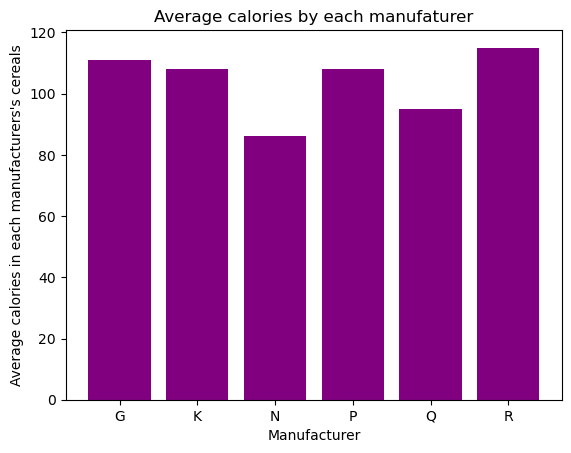

In [112]:
# Plot the data
plt.bar(m_name[1:], calories_mean, color = 'purple')
plt.xlabel("Manufacturer")
plt.ylabel("Average calories in each manufacturers's cereals")
plt.title("Average calories by each manufaturer")
plt.show()

In [ ]:
# Case 10: Manufacturer vs calories


In [73]:
new_dataset

,Cereal,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Shelf,Potassium,Vitamins,Weight,Cups
0,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.500000,10.000000,1,70.000000,25,1.00,0.750000
1,Basic 4,G,C,130,3,2,210,2.0,18.000000,8.000000,3,100.000000,25,1.33,0.750000
2,Cheerios,G,C,110,6,2,290,2.0,17.000000,1.000000,1,105.000000,25,1.00,1.250000
3,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.000000,9.000000,2,45.000000,25,1.00,0.750000
4,Clusters,G,C,110,3,2,140,2.0,13.000000,7.000000,3,105.000000,25,1.00,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Rice Chex,R,C,110,1,0,240,0.0,23.000000,2.000000,1,30.000000,25,1.00,1.130000
73,Wheat Chex,R,C,100,3,1,230,3.0,17.000000,3.000000,1,115.000000,25,1.00,0.670000
74,Maypo,A,H,100,4,1,0,0.0,16.000000,3.000000,2,95.000000,25,1.00,0.785442
75,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.000000,0.000000,2,98.649411,0,1.00,1.000000


In [113]:
# # Case 10: American
# data_columns = ['Calories', 'Protein', 'Fat', 'Sodium', 'Fiber', 'Carbohydrates', 
#                 'Sugars', 'Shelf', 'Potassium', 'Vitamins', 'Weight', 'Cups']
# x = 0
# a_cereal = []
# for x in data_columns:
#     a_cereal.append(new_dataset[x][74])

# plt.barh(data_columns, a_cereal)
# plt.xlabel("Quantities")
# plt.legend(title = 'American Home Food')
# plt.grid()
# plt.show()

In [162]:
new_dataset['Manufacturer'][74]

'A'

In [163]:
new_dataset.columns

Index(['Cereal', 'Manufacturer', 'Type', 'Calories', 'Protein', 'Fat',
       'Sodium', 'Fiber', 'Carbohydrates', 'Sugars', 'Shelf', 'Potassium',
       'Vitamins', 'Weight', 'Cups'],
      dtype='object')